In [44]:
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

In [45]:
#读取数据
iris = datasets.load_iris()
iris_data_arr = np.array(iris.data)
iris_target_arr = np.array(iris.target)

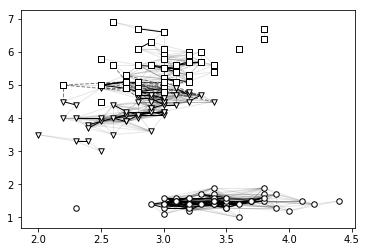

In [46]:
#确定阈值，画图
def Draw_iris(data, target):
        x = data
        x1, x2 = x[:,1], x[:,2]
        G = nx.house_graph()
        # explicitly set positions
        pos = {}
        for i in range(0, 150):
            pos[i] = (x1[i],x2[i])
        nodelists1,  nodelists2,  nodelists3 = [],[],[]
        #将数据集按照target分为3组
        for i in range(0, 150):
            if target[i]==0:
                nodelists1.append(i)
            elif target[i]==1:
                nodelists2.append(i)
            else:
                nodelists3.append(i)
        #按照两点之间的距离分为4组
        edglist1, edglist2, edglist3, edglist4 = [], [], [], []
        distance = np.zeros([150,150])
        for i in range(0,150):
            for j in range(i,150):
                distance[i][j] = distance[j][i] = np.linalg.norm(x[i] - x[j])      
                if target[i]==target[j]:
                    if distance[i][j]<0.3:
                        edglist1.append((i, j))
                    elif distance[i][j]<0.6:
                        edglist2.append((i, j))
                else:
                    if distance[i][j]<0.59:
                        edglist3.append((i, j))
                    elif distance[i][j]<0.45:
                        edglist4.append((i, j))
        #设置节点           
        nx.draw_networkx_nodes(G,pos, node_size=30,nodelist=nodelists1, node_color="w", edgecolors="black", node_shape='o')
        nx.draw_networkx_nodes(G,pos, node_size=30,nodelist=nodelists2, node_color="w", edgecolors="black", node_shape='v')
        nx.draw_networkx_nodes(G,pos, node_size=30,nodelist=nodelists3, node_color="w", edgecolors="black",node_shape='s')
        #设置边
        nx.draw_networkx_edges(G,pos,edgelist=edglist1 )
        nx.draw_networkx_edges(G,pos,edgelist=edglist2, alpha=0.1)
        nx.draw_networkx_edges(G,pos,edgelist=edglist3, alpha=0.5, style='dashed')
        nx.draw_networkx_edges(G,pos,edgelist=edglist4, alpha=0.1, style='dashed')
        
        plt.axis('on')
        plt.show()

Draw_iris(iris_data_arr, iris_target_arr)

In [47]:
def get_eig(data):
    #获得带权邻接矩阵
    res = metrics.pairwise.rbf_kernel(data)
    for i in range(len(res)):
        res[i][i] = 0
    #获得度数矩阵
    D = np.diag(np.power(np.sum(res, axis=1), -0.5))
    #拉普拉斯矩阵
    L = L = np.eye(len(data)) - np.dot(np.dot(D, res), D)
    #特征值，特征向量
    eigvals, eigvecs = np.linalg.eig(L)
    return eigvals, eigvecs

In [48]:
def special(eigvecs, k, n_cluster):
    eigvecs_k = np.argsort(eigvecs)[:,0:k]
    #前k个特征值对应的特征向量
    indices = np.argsort(eigvecs)
    np.random.seed(7)
    #kmeans预测
    labels = KMeans(n_clusters=n_cluster).fit_predict(indices)
    return eigvecs_k,labels

In [49]:
#预测分簇正确率
def getScore(y_true, y_pre):
    sum = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pre[i]:
            sum += 1
    score = sum/len(y_true)
    return score

In [50]:
eigvals, eigvecs = get_eig(iris_data_arr)

In [51]:
#遍历，得到score最大的参数值
for index, k in enumerate((1, 2, 3, 4, 5, 6, 7, 8, 9)):
    for index, n_cluster in enumerate((1, 2, 3, 4, 5, 6, 7, 8, 9)):
        eigvecs_k, labels = special(eigvecs, k=k, n_cluster=n_cluster)
        score = getScore(iris_target_arr, labels)
        print('选取前K个特征向量:', k, '   聚类的数目为:', n_cluster, '   score:', score)

选取前K个特征向量: 1    聚类的数目为: 1    score: 0.3333333333333333
选取前K个特征向量: 1    聚类的数目为: 2    score: 0.02666666666666667
选取前K个特征向量: 1    聚类的数目为: 3    score: 0.6933333333333334
选取前K个特征向量: 1    聚类的数目为: 4    score: 0.14666666666666667
选取前K个特征向量: 1    聚类的数目为: 5    score: 0.14
选取前K个特征向量: 1    聚类的数目为: 6    score: 0.22
选取前K个特征向量: 1    聚类的数目为: 7    score: 0.29333333333333333
选取前K个特征向量: 1    聚类的数目为: 8    score: 0.06
选取前K个特征向量: 1    聚类的数目为: 9    score: 0.05333333333333334
选取前K个特征向量: 2    聚类的数目为: 1    score: 0.3333333333333333
选取前K个特征向量: 2    聚类的数目为: 2    score: 0.02666666666666667
选取前K个特征向量: 2    聚类的数目为: 3    score: 0.6933333333333334
选取前K个特征向量: 2    聚类的数目为: 4    score: 0.14666666666666667
选取前K个特征向量: 2    聚类的数目为: 5    score: 0.14
选取前K个特征向量: 2    聚类的数目为: 6    score: 0.22
选取前K个特征向量: 2    聚类的数目为: 7    score: 0.29333333333333333
选取前K个特征向量: 2    聚类的数目为: 8    score: 0.06
选取前K个特征向量: 2    聚类的数目为: 9    score: 0.05333333333333334
选取前K个特征向量: 3    聚类的数目为: 1    score: 0.3333333333333333
选取前K个特征向量: 3    聚类的数目为: 2    sc

In [54]:
eigvecs_k, labels = special(eigvecs, k=3, n_cluster=3)

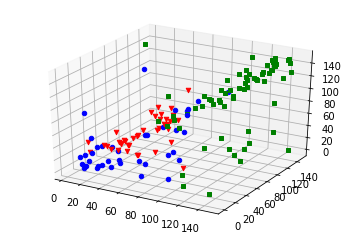

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(eigvecs_k)):
    if labels[i] == 0:
        ax.scatter(eigvecs_k[i,1], eigvecs_k[i, 0], eigvecs_k[i, 2], c="r", marker="v")
    elif labels[i] == 1:
        ax.scatter(eigvecs_k[i,0], eigvecs_k[i, 1], eigvecs_k[i, 2], c="g", marker="s")
    else:
        ax.scatter(eigvecs_k[i,0], eigvecs_k[i, 1], eigvecs_k[i, 2], c="b", marker="o")